<a href="https://colab.research.google.com/github/Kennedy216/Kennedy216/blob/main/Copy_of_Untitled313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='HAM10000.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('HAM10000.zip')
f.keys()
!unzip 'HAM10000.zip'

Streaming output truncated to the last 5000 lines.
  inflating: selected_images/bkl/_682_3753763.jpg  
  inflating: __MACOSX/selected_images/bkl/.__682_3753763.jpg  
  inflating: selected_images/bkl/_81_292851.jpg  
  inflating: __MACOSX/selected_images/bkl/.__81_292851.jpg  
  inflating: selected_images/bkl/_632_5465408.jpg  
  inflating: __MACOSX/selected_images/bkl/.__632_5465408.jpg  
  inflating: selected_images/bkl/ISIC_0024408.jpg  
  inflating: __MACOSX/selected_images/bkl/._ISIC_0024408.jpg  
  inflating: selected_images/bkl/_898_9102098.jpg  
  inflating: __MACOSX/selected_images/bkl/.__898_9102098.jpg  
  inflating: selected_images/bkl/_827_4495071.jpg  
  inflating: __MACOSX/selected_images/bkl/.__827_4495071.jpg  
  inflating: selected_images/bkl/_224_5943778.jpg  
  inflating: __MACOSX/selected_images/bkl/.__224_5943778.jpg  
  inflating: selected_images/bkl/_732_2112964.jpg  
  inflating: __MACOSX/selected_images/bkl/.__732_2112964.jpg  
  inflating: selected_images/bkl/

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# STEP 1: Install required packages
!pip install tensorflow tqdm --quiet

# STEP 2: Import libraries
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tqdm import tqdm

# STEP 3: Define paths
input_root = '/content/selected_images'     # Your image dataset path
output_root = '/content/HAM_seg'    # Output folder for segmentation masks
os.makedirs(output_root, exist_ok=True)

# STEP 4: Preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB').resize((128, 128))
    image_array = np.array(image) / 255.0
    return np.expand_dims(image_array, axis=0), image.size

# STEP 5: Dummy segmentation model (replace this with real model later)
def dummy_segmentation_model(image_tensor):
    # Simple green channel threshold for demo purposes
    mask = (image_tensor[0][:, :, 1] > 0.5).astype(np.uint8) * 255
    return mask

# Optional: Load real segmentation model here (U-Net or custom model)
# model = tf.keras.models.load_model('/content/unet_model.h5')
# STEP 6: Iterate over all class folders
for class_name in os.listdir(input_root):
    class_input_path = os.path.join(input_root, class_name)

    # Skip non-directories like .DS_Store
    if not os.path.isdir(class_input_path):
        continue

    class_output_path = os.path.join(output_root, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    # STEP 7: Process each image
    for img_name in tqdm(os.listdir(class_input_path), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_input_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        try:
            img_tensor, original_size = preprocess_image(img_path)

            # Real model prediction (uncomment when using real model)
            # prediction = model.predict(img_tensor)
            # mask = (prediction[0, :, :, 0] > 0.5).astype(np.uint8) * 255

            # Dummy segmentation
            mask = dummy_segmentation_model(img_tensor)

            # Resize mask back to original image size and save
            mask_image = Image.fromarray(mask).resize(original_size)
            mask_image.save(os.path.join(class_output_path, img_name))

        except Exception as e:
            print(f"❌ Failed to process {img_path}: {e}")


Processing vasc: 100%|██████████| 500/500 [00:01<00:00, 294.42it/s]


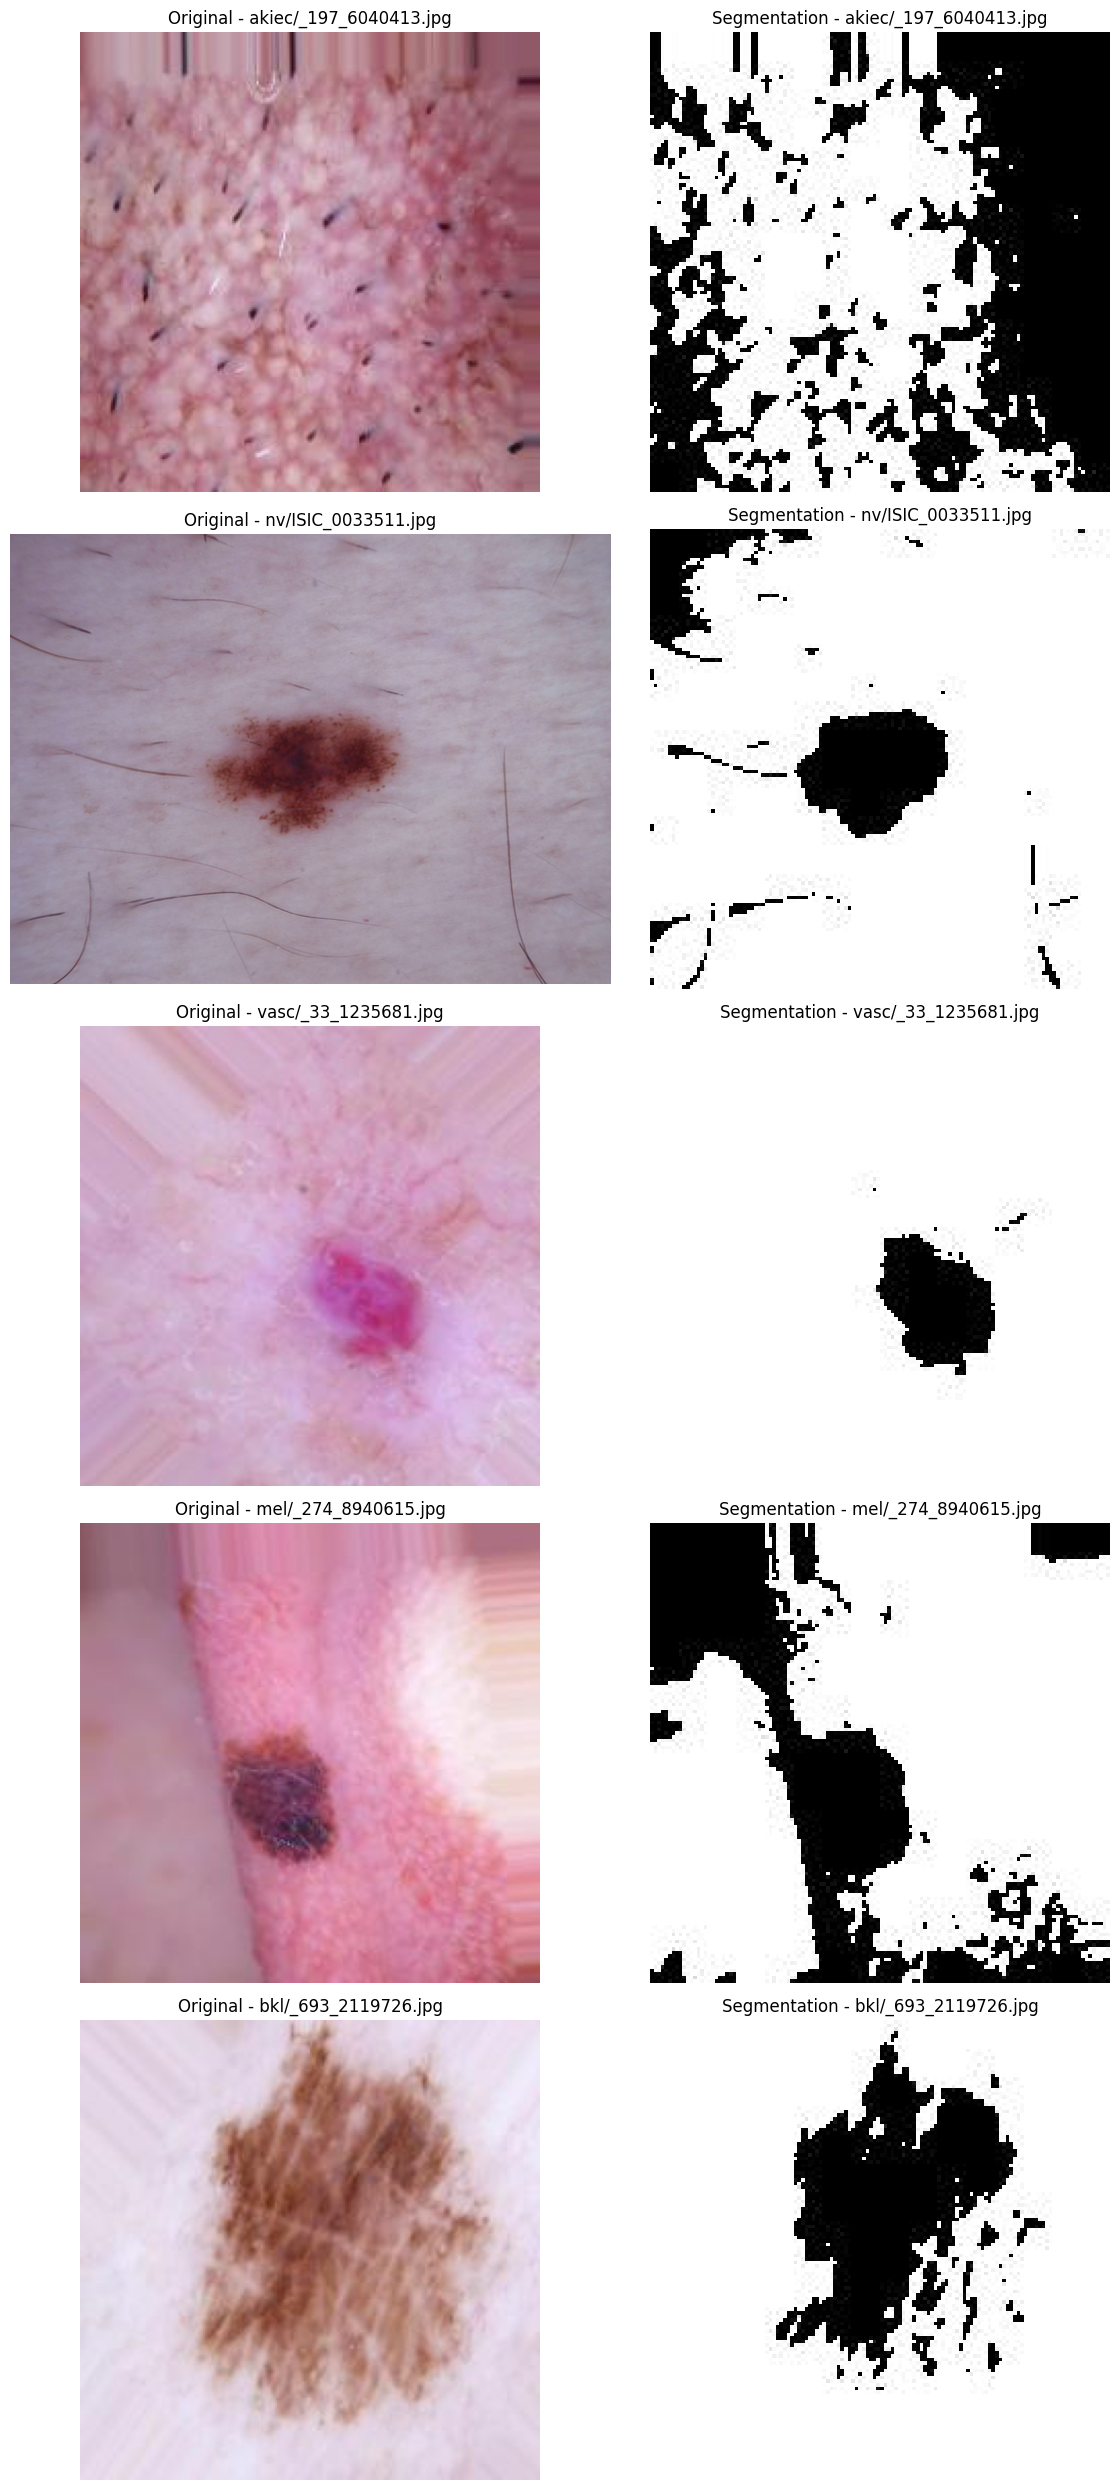

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Paths
original_path = '/content/selected_images'
segmented_path = '/content/HAM_seg'

# How many samples to show
num_samples = 5
# Collect valid (class, image) pairs
samples = []
for class_name in os.listdir(original_path):
    class_orig = os.path.join(original_path, class_name)
    class_seg = os.path.join(segmented_path, class_name)

    # Check if the class folder exists in both original and segmented paths
    if os.path.isdir(class_orig) and os.path.isdir(class_seg):
        # List images in the original class directory
        images = os.listdir(class_orig)
        for img in images:
            # Check if the corresponding segmented image exists
            if os.path.exists(os.path.join(class_seg, img)):
                samples.append((class_name, img))

# Randomly select samples
# Ensure we don't try to select more samples than available
selected_samples = random.sample(samples, min(num_samples, len(samples)))

# Plotting
# Adjust figsize dynamically based on the number of selected samples
fig, axes = plt.subplots(len(selected_samples), 2, figsize=(12, 5 * len(selected_samples)))

# Handle the case where only one sample is selected (axes will not be a 2D array)
if len(selected_samples) == 1:
    axes = np.array([axes])

for i, (cls, img_name) in enumerate(selected_samples):
    try:
        orig_img = Image.open(os.path.join(original_path, cls, img_name))
        seg_img = Image.open(os.path.join(segmented_path, cls, img_name))

        axes[i, 0].imshow(orig_img)
        axes[i, 0].set_title(f"Original - {cls}/{img_name}")
        axes[i, 0].axis('off')

        axes[i, 1].imshow(seg_img, cmap='gray')
        axes[i, 1].set_title(f"Segmentation - {cls}/{img_name}")
        axes[i, 1].axis('off')
    except Exception as e:
        print(f"❌ Could not load images for {cls}/{img_name}: {e}")
        # Clear the axes if images cannot be loaded
        axes[i, 0].axis('off')
        axes[i, 1].axis('off')


plt.tight_layout()
plt.show()

In [ ]:
# STEP 1: Install and import libraries
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# STEP 2: Define dataset paths
dataset_path = '/content/HAM_seg'

In [ ]:
# STEP 3: Image size and parameters
image_size = 224
input_shape = (image_size, image_size, 3)
batch_size = 32
num_classes = len(os.listdir(dataset_path))  # auto-detect number of classes

In [ ]:
# STEP 4: Create train and validation generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2800 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [ ]:
# STEP 5: Build your CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# STEP 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# STEP 7: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.1849 - loss: 2.2062 - val_accuracy: 0.3000 - val_loss: 1.7778
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.3560 - loss: 1.7035 - val_accuracy: 0.2843 - val_loss: 1.8128
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.4617 - loss: 1.4481 - val_accuracy: 0.2886 - val_loss: 1.8910
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.6119 - loss: 1.1107 - val_accuracy: 0.2714 - val_loss: 2.2208
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.7301 - loss: 0.7811 - val_accuracy: 0.2529 - val_loss: 2.9548
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.8108 - loss: 0.5518 - val_accuracy: 0.2400 - val_loss: 3.2135
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.8677 - loss: 0.4030 - val_accuracy: 0.2586 - val_loss: 3.5451
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.8993 - loss: 0.3016 - val_accuracy: 0.2557 - val_loss: 4.

In [ ]:
# STEP 8: Evaluate model
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 931ms/step - accuracy: 0.2513 - loss: 4.1488

✅ Validation Accuracy: 26.00%


In [ ]:
# STEP 9: Classification report
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = preds.argmax(axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 978ms/step

Classification Report:
              precision    recall  f1-score   support

       akiec       0.40      0.38      0.39       100
         bcc       0.23      0.16      0.19       100
         bkl       0.13      0.13      0.13       100
          df       0.23      0.16      0.19       100
         mel       0.18      0.17      0.17       100
          nv       0.29      0.63      0.40       100
        vasc       0.33      0.19      0.24       100

    accuracy                           0.26       700
   macro avg       0.26      0.26      0.24       700
weighted avg       0.26      0.26      0.24       700



In [ ]:
# STEP 9: Classification report
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = preds.argmax(axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 942ms/step

Classification Report:
              precision    recall  f1-score   support

       akiec       0.40      0.38      0.39       100
         bcc       0.23      0.16      0.19       100
         bkl       0.13      0.13      0.13       100
          df       0.23      0.16      0.19       100
         mel       0.18      0.17      0.17       100
          nv       0.29      0.63      0.40       100
        vasc       0.33      0.19      0.24       100

    accuracy                           0.26       700
   macro avg       0.26      0.26      0.24       700
weighted avg       0.26      0.26      0.24       700



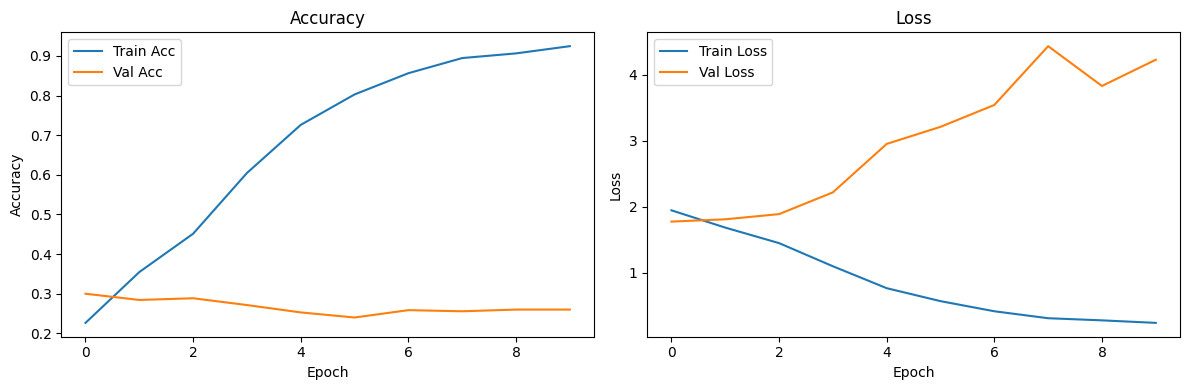

In [ ]:
# STEP 11: Plot accuracy/loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
